# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

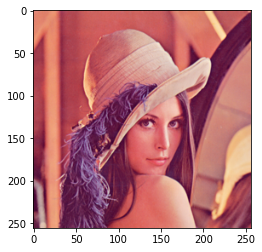

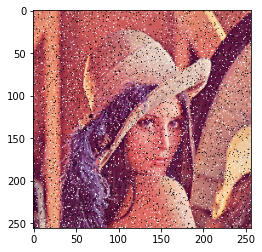

In [1]:

import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

lena=cv2.imread("lenaRGB.png")
lena=cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)
lena_szum=cv2.imread("lenaRGBSzum.png")
lena_szum=cv2.cvtColor(lena_szum,cv2.COLOR_BGR2RGB)
plt.imshow(lena)
plt.show()
plt.imshow(lena_szum)
plt.show()

In [2]:
def rgb_median(I,m_size):
  new_I=np.zeros(I.shape, dtype=np.uint8)
  for y in range((m_size-1)//2,new_I.shape[0]-1):
    for x in range((m_size-1)//2,new_I.shape[1]-1):

      window=I[y-1:y+2,x-1:x+2].astype('float')
      dRGB=np.zeros((m_size,m_size))

      for i in range(window.shape[0]):
        for j in range(window.shape[1]):
          
          dRGB[i][j]=np.sqrt(np.sum(np.square(window-window[i,j]),axis=2)).sum()

      minimal=np.argmin(dRGB)
      unraveld=np.unravel_index(minimal,(m_size,m_size))

      new_I[y,x]=window[unraveld[0],unraveld[1]]

  return new_I


      

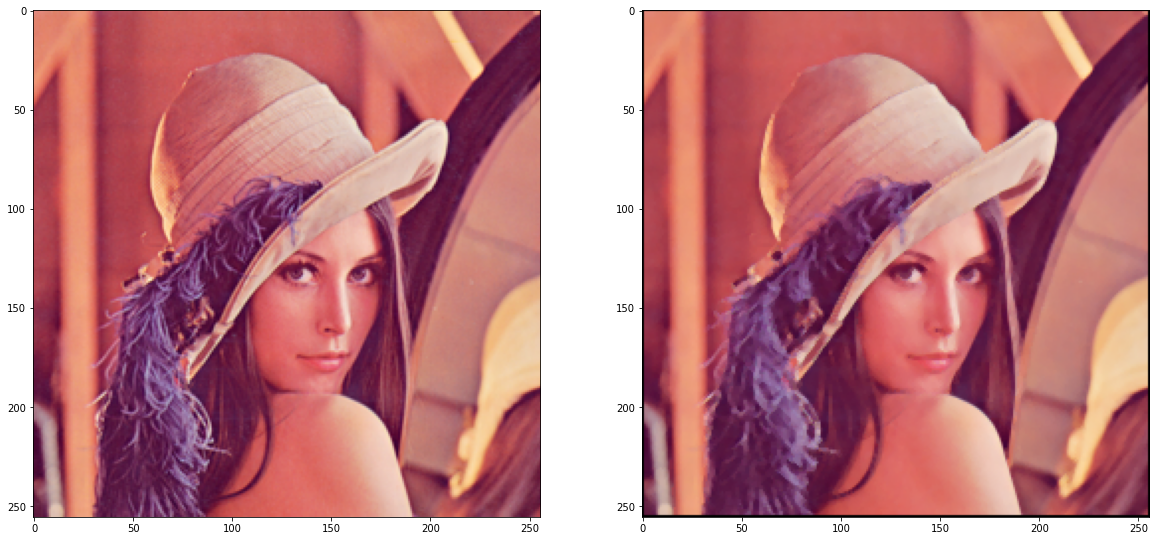

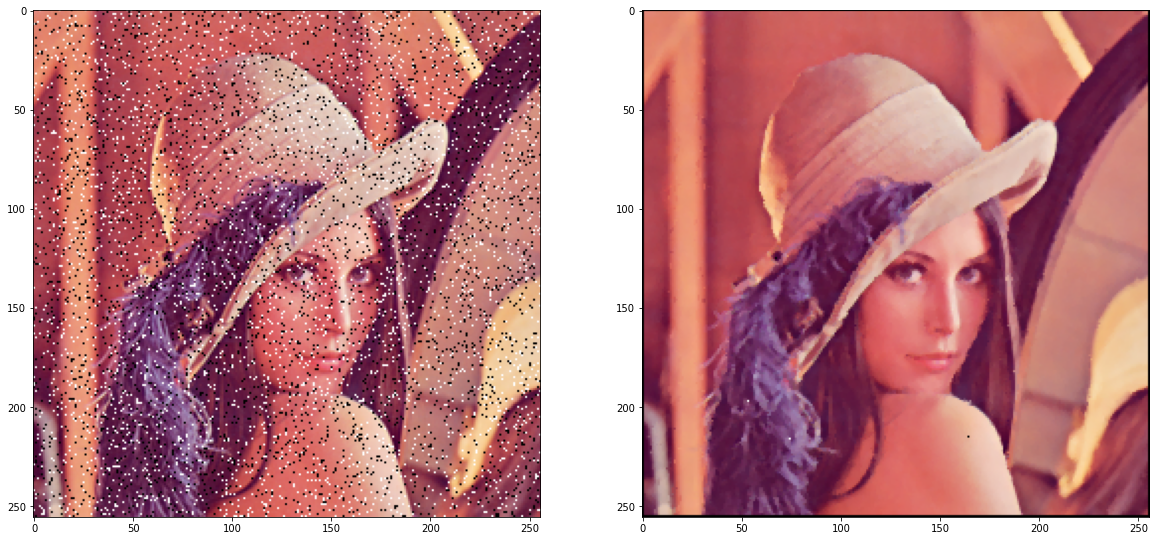

In [3]:
new_I=rgb_median(lena,3)
fig,axs=plt.subplots(1,2)
fig.set_size_inches(20,10)
axs[0].imshow(lena)
axs[1].imshow(new_I)
plt.show()

new_I=rgb_median(lena_szum,3)
fig,axs=plt.subplots(1,2)
fig.set_size_inches(20,10)
axs[0].imshow(lena_szum)
axs[1].imshow(new_I)
plt.show()